**Design a simple linear regression model using all possible features and and the minimum MSE and R2 Score.**

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [13]:
df = pd.read_csv("U:\Machine Learning 3rd Semester\Datasets\FuelConsumptionCo2.csv")

In [14]:
df.head(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230


**Summarizing the data**

In [15]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [16]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_HWY']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB_MPG,FUELCONSUMPTION_HWY
0,2.0,4,33,6.7
1,2.4,4,29,7.7
2,1.5,4,48,5.8
3,3.5,6,25,9.1
4,3.5,6,27,8.7
5,3.5,6,28,7.7
6,3.5,6,28,8.1
7,3.7,6,25,9.0
8,3.7,6,24,9.5


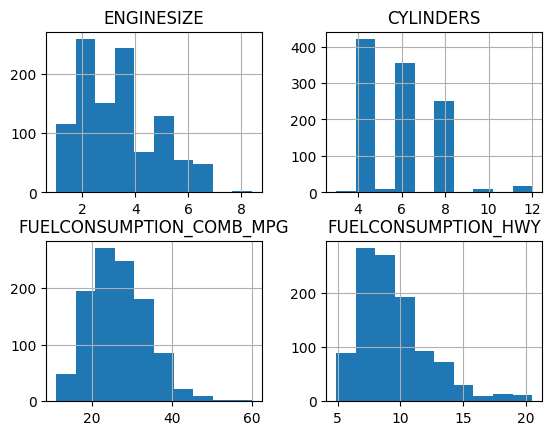

In [17]:
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_HWY']]
viz.hist()
plt.show()

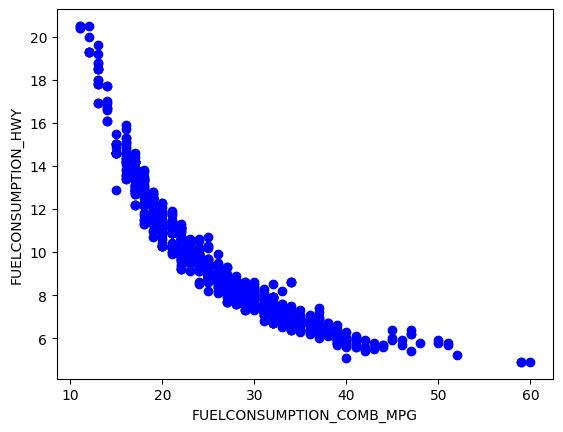

In [18]:
plt.scatter(cdf.FUELCONSUMPTION_COMB_MPG, cdf.FUELCONSUMPTION_HWY, color = 'blue')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("FUELCONSUMPTION_HWY")
plt.show()

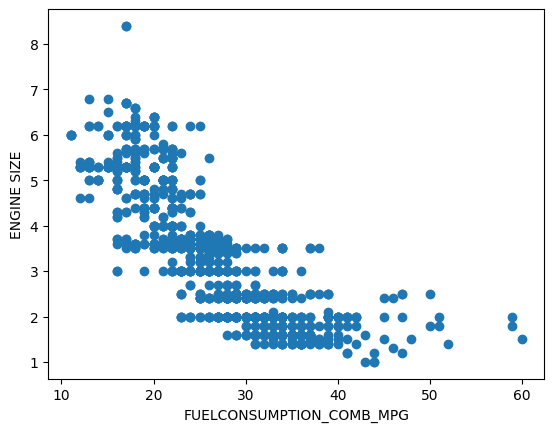

In [19]:
plt.scatter(cdf.FUELCONSUMPTION_COMB_MPG, cdf.ENGINESIZE)
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("ENGINE SIZE")
plt.show()

**Creating & Training the Dataset**

In [20]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(train)
print(test)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB_MPG  FUELCONSUMPTION_HWY
0            2.0          4                        33                  6.7
1            2.4          4                        29                  7.7
2            1.5          4                        48                  5.8
3            3.5          6                        25                  9.1
4            3.5          6                        27                  8.7
...          ...        ...                       ...                  ...
1060         3.0          6                        25                  9.5
1061         3.2          6                        25                  8.9
1062         3.0          6                        24                  9.8
1063         3.2          6                        25                  9.5
1065         3.2          6                        25                  9.3

[851 rows x 4 columns]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB_MPG  FUELCONSUMPTION_HWY
6

**Simple Linear Regression Model**

Train Data Distribution

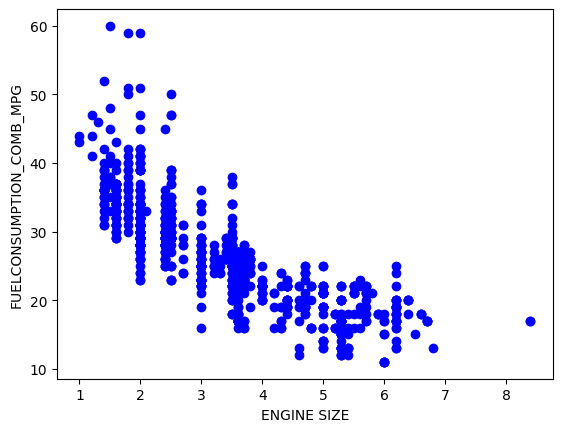

In [21]:
plt.scatter(train.ENGINESIZE, train.FUELCONSUMPTION_COMB_MPG, color = 'blue')
plt.xlabel("ENGINE SIZE")
plt.ylabel("FUELCONSUMPTION_COMB_MPG")
plt.show()

Modelling

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['FUELCONSUMPTION_HWY']])
regr.fit(train_x, train_y)
#The Coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[-0.3306433]]
Intercept:  [18.24764401]


**Evaluation**

In [23]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['FUELCONSUMPTION_HWY']])
print(test_y)
test_y_ = regr.predict(test_x)
print(test_y_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

[[ 8.1]
 [ 9.5]
 [12.2]
 [12.2]
 [ 7.4]
 [ 8.1]
 [ 8.8]
 [ 8.8]
 [ 9.7]
 [12.6]
 [ 8.5]
 [ 9.2]
 [11. ]
 [13.4]
 [ 9.2]
 [ 9.8]
 [ 7.6]
 [ 7.6]
 [ 8.8]
 [11.5]
 [12.2]
 [14.9]
 [ 7. ]
 [ 7.9]
 [ 7.8]
 [ 8. ]
 [ 8.6]
 [ 8. ]
 [ 7.1]
 [ 7.9]
 [ 7.6]
 [ 8.5]
 [ 9.1]
 [ 9.8]
 [ 6.7]
 [ 7.9]
 [ 7.5]
 [ 8.2]
 [ 9.9]
 [ 8.9]
 [12.9]
 [12.9]
 [11.8]
 [16.1]
 [10.4]
 [ 9.8]
 [ 9.9]
 [ 6.3]
 [ 6.5]
 [ 5.1]
 [13.1]
 [ 9.9]
 [14.2]
 [15. ]
 [15. ]
 [11.3]
 [ 7.9]
 [ 8.3]
 [14.2]
 [ 6.7]
 [ 6.2]
 [ 7. ]
 [ 7. ]
 [ 6. ]
 [11.1]
 [14.6]
 [14.6]
 [10.2]
 [ 7.7]
 [ 8.2]
 [11.2]
 [11.2]
 [ 9.2]
 [ 7.7]
 [10.3]
 [ 9.5]
 [ 8.7]
 [ 7.6]
 [10.3]
 [ 6.7]
 [ 9.8]
 [14.4]
 [13.3]
 [ 9.7]
 [13.9]
 [16.7]
 [12.3]
 [11.4]
 [ 6.4]
 [ 6.4]
 [ 8.3]
 [ 6.4]
 [ 8.3]
 [ 8.5]
 [17.7]
 [14.2]
 [13.9]
 [19.3]
 [13.7]
 [10.6]
 [10.6]
 [ 7.3]
 [11.1]
 [ 8.5]
 [ 9.7]
 [ 6.4]
 [ 9.1]
 [ 9.7]
 [ 7.5]
 [ 7. ]
 [ 5.9]
 [ 8.2]
 [ 9.3]
 [ 9.3]
 [ 9.8]
 [11.9]
 [ 8.2]
 [ 9.1]
 [ 8.7]
 [10.3]
 [11.7]
 [13. ]
 [ 7.8]
 [10.3]
 [ 6.6]
